## Model Benchmarks, Tuning and Selection

### Contents:
- [Data Import](#Data-Import)
- [Feature Selection](#Feature-Selection)
- [Model Benchmark](#Model-Benchmark)
- [Models with Regularization](#Models-with-Regularization)
- [Select and scale features with effective features](#Select-and-scale-features-with-effective-features)
- [Comparing and selecting model for implementation](#Comparing-and-selecting-model-for-implementation)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Import

In [2]:
train_set = pd.read_csv('../datasets/train_set.csv')
test_set = pd.read_csv('../datasets/test_set.csv')

In [3]:
train_set.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,House Style,Overall Qual,Overall Cond,Year Built,...,Paved_Drive_Y,sale_type_New,sale_type_WD,sale_type_other,Liv Area_bsmt sf,qual_neighbor,Liv Area_qual,bsmt sf_neighbor,Liv Area_neighbor,bsmt sf_qual
0,0,109,533352170,60,100.650661,13517,2,6,8,1976,...,1,0,1,0,1072275.0,54,8874,6525.0,13311,4350.0
1,1,544,531379050,60,43.000000,11492,2,7,10,1996,...,1,0,1,0,1937386.0,98,14854,12782.0,29708,6391.0
2,2,153,535304180,20,68.000000,7922,1,5,7,1953,...,1,0,1,0,1117249.0,60,5285,12684.0,12684,5285.0
3,3,318,916386060,60,73.000000,9802,2,5,5,2006,...,1,0,1,0,554496.0,115,7220,8832.0,33212,1920.0
4,4,255,906425045,50,82.000000,14235,1,6,8,1900,...,0,0,1,0,976820.0,84,8670,9464.0,20230,4056.0


In [4]:
test_set.head()

,Unnamed: 0,Id,PID,MS SubClass,Lot Frontage,Lot Area,House Style,Overall Qual,Overall Cond,Year Built,...,Paved_Drive_Y,sale_type_New,sale_type_WD,sale_type_other,Liv Area_bsmt sf,qual_neighbor,Liv Area_qual,bsmt sf_neighbor,Liv Area_neighbor,bsmt sf_qual
0,0,2658,902301120,190,69.000000,9142,2,6,8,1910,...,1,0,1,0,1966560,24,11568,4080,7712,6120
1,1,2718,905108090,90,69.375137,9662,1,5,4,1977,...,1,0,1,0,3869089,45,9835,17703,17703,9835
2,2,2414,528218130,60,58.000000,17104,2,7,10,2006,...,1,1,0,0,978384,112,10472,10464,23936,4578
3,3,1989,902207150,30,60.000000,8520,1,5,6,1923,...,0,0,1,0,937024,20,4840,3872,3872,4840
4,4,625,535105100,20,68.060835,9500,1,6,7,1963,...,1,0,1,0,1943236,72,8364,16728,16728,8364


## Feature Selection

In [5]:
abs(train_set.corr()['SalePrice']).sort_values(ascending = False)[1:30]
# Top 30 features that are correlated to SalePrice

Liv Area_qual         0.872916
Liv Area_neighbor     0.855079
bsmt sf_qual          0.830457
qual_neighbor         0.822835
Liv Area_bsmt sf      0.821892
bsmt sf_neighbor      0.821573
Overall Qual          0.804410
Neighborhood_rank     0.721582
Gr Liv Area           0.720759
Exter Qual            0.715866
Kitchen Qual          0.694008
Total Bsmt SF         0.667955
Garage Area           0.655399
1st Flr SF            0.651941
Garage Cars           0.648670
Overall Cond          0.642632
Bsmt Qual             0.618223
Year Built            0.572934
Year Remod/Add        0.550780
Full Bath             0.537682
foundation_PConc      0.530402
Mas Vnr Area          0.511849
TotRms AbvGrd         0.509194
Fireplaces            0.473137
Heating QC            0.459751
BsmtFin SF 1          0.447029
garrage_finish_Unf    0.433868
vnr_none              0.422175
Bsmt Exposure         0.415299
Name: SalePrice, dtype: float64

In [6]:
selected_features = ['Overall Qual','Neighborhood_rank','Gr Liv Area','Exter Qual','Garage Area',
                     'Liv Area_bsmt sf','qual_neighbor','Liv Area_qual','bsmt sf_neighbor','Liv Area_neighbor','bsmt sf_qual']

In [7]:
X = train_set[selected_features]
y = train_set['SalePrice']

- Overall Qual : Overall quality of the property, higher quality finish means less home reno and home buyers will pay higher to purchase
- Neighborhood rank : Selected neighborhood rank as property prices are sensitive to its neighborhood, crime rate, schools etc
- Gr Liv Area : Home buyers are likely to spend more on larger living space. Measure of prices are usually quantified as per sqft
- Exter Qual : Attractive exterior surely attracts more buyers for viewing. Properties with high view rate will tend to fetch higher price as higher bidder wins
- Garage Area : Houses with larger garage fetch higher as there is added security for your automobile

## Model Benchmark

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
# scale and center the data with respect to X_train

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# instantiate Linear regression

In [12]:
lr.fit(X_train_ss,y_train)
lr_pred = lr.predict(X_test_ss)
# fitting and predicting

Linear Regression
Mean Absolute error	:18337.69586
Mean Squared error	:650517324.45396
Root Mean Squared error	:25505.24112
R^2 score is		:0.87947


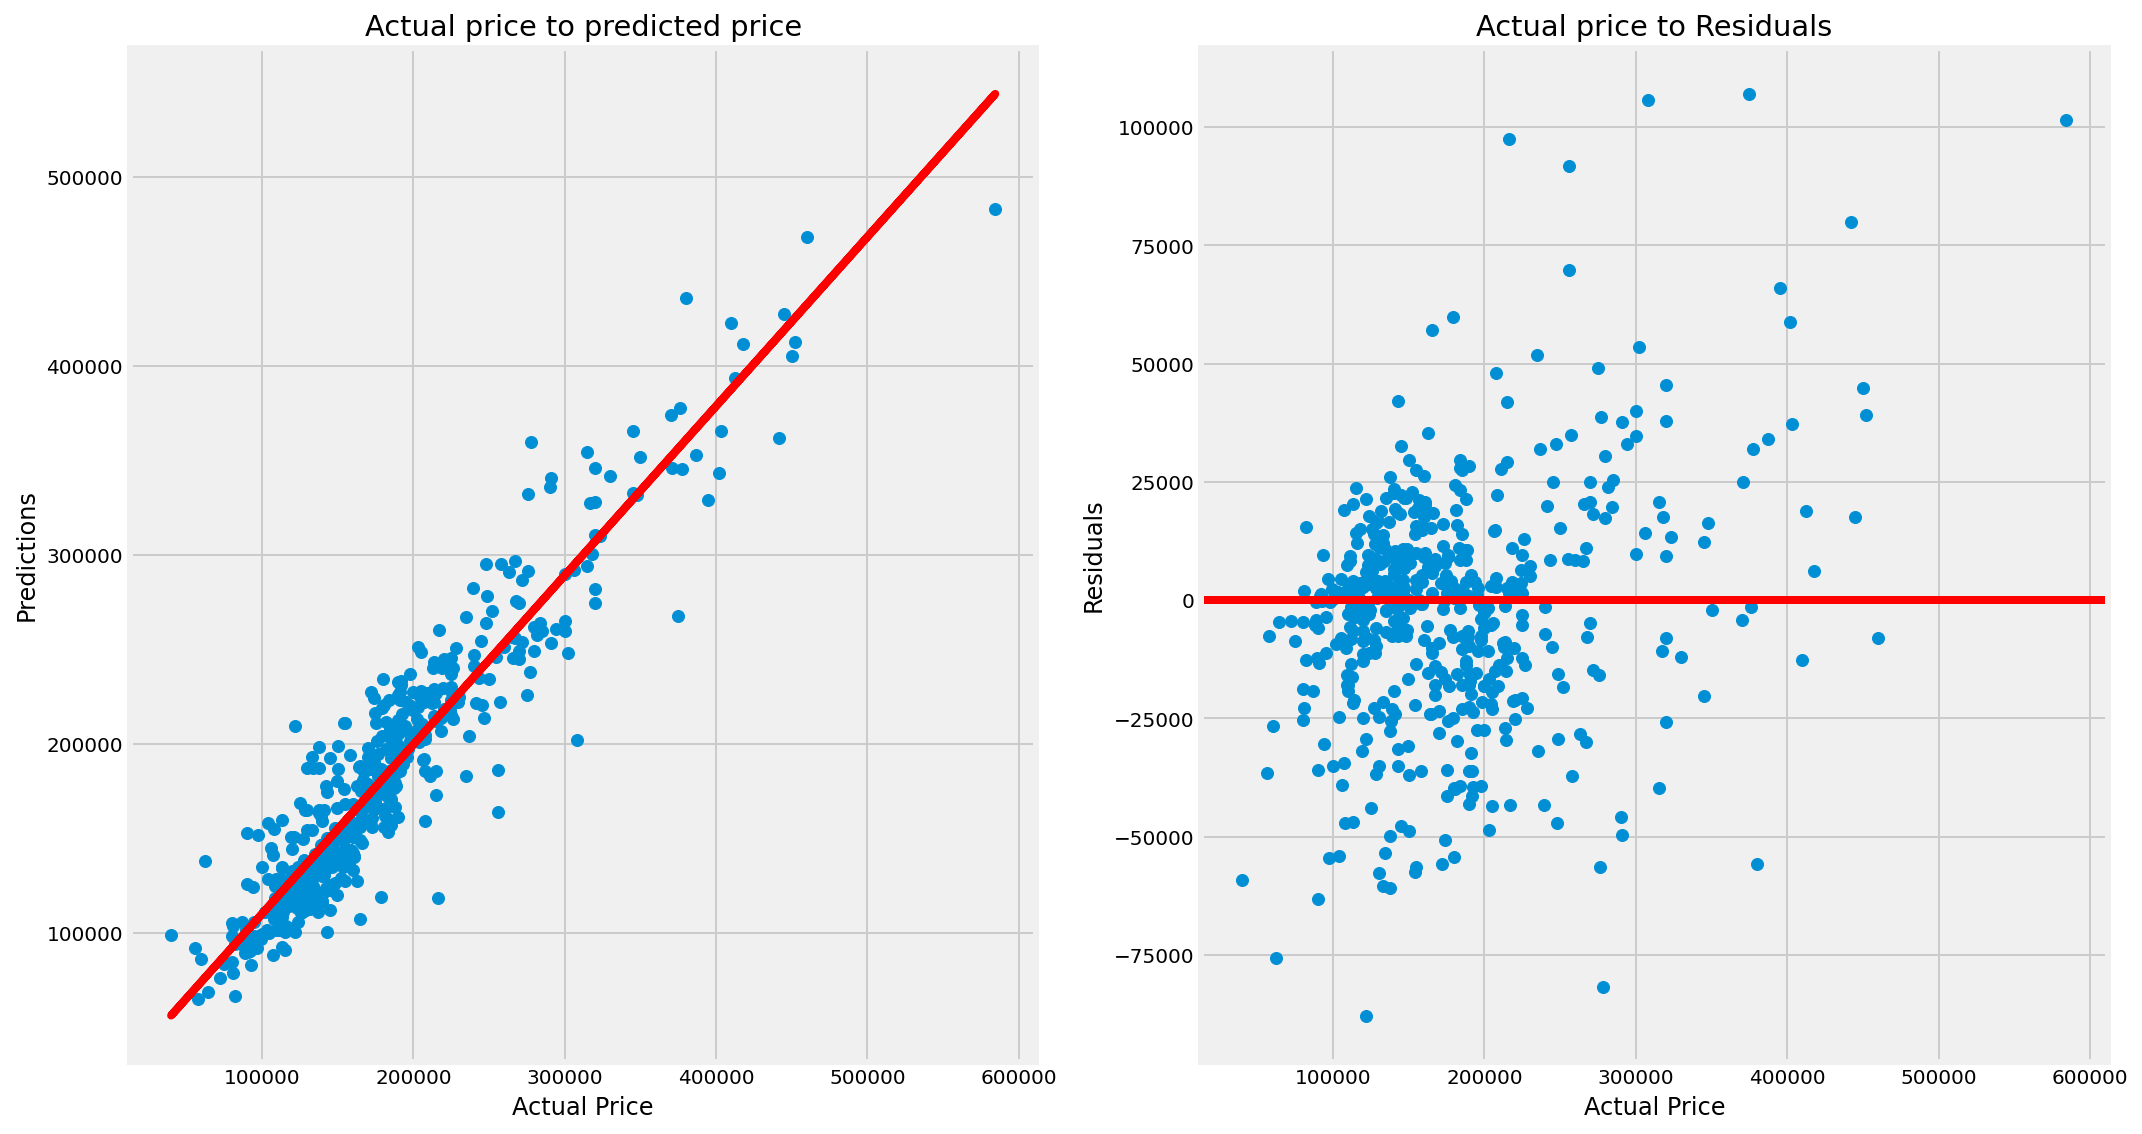

In [13]:
fig, ax = plt.subplots(1,2, figsize = [15,8]);
m, c = np.polyfit(y_test,lr_pred,deg=1)
ax[0].scatter(y_test,lr_pred);
ax[0].plot(y_test,(m*y_test)+c,c='r')
ax[0].set_title('Actual price to predicted price')
ax[0].set_ylabel('Predictions')
ax[0].set_xlabel('Actual Price')
ax[1].scatter(y_test,y_test - lr_pred);
ax[1].axhline(y=0,c='r');
ax[1].set_title('Actual price to Residuals')
ax[1].set_xlabel('Actual Price')
ax[1].set_ylabel('Residuals')
fig.tight_layout()
print('Linear Regression')
print('Mean Absolute error\t:{:.5f}'.format(mean_absolute_error(y_test,lr_pred)))
print('Mean Squared error\t:{:.5f}'.format(mean_squared_error(y_test,lr_pred)))
print('Root Mean Squared error\t:{:.5f}'.format(np.sqrt(mean_squared_error(y_test,lr_pred))))
print('R^2 score is\t\t:{:.5f}'.format(np.mean(cross_val_score(lr,X_test_ss,y_test,cv=10))))

In [14]:
pd.DataFrame(lr.coef_,index = X.columns).rename(columns={0:'coefficient'})
# Coefficients of parameters from Linear Model

,coefficient
Overall Qual,-15804.642968
Neighborhood_rank,2793.033787
Gr Liv Area,-15662.664327
Exter Qual,7986.707210
Garage Area,6331.383107
Liv Area_bsmt sf,-6754.143525
qual_neighbor,-3097.654474
Liv Area_qual,62218.324138
bsmt sf_neighbor,7098.062094
Liv Area_neighbor,11933.780008


## Models with Regularization

In [15]:
X = train_set.drop(columns = ['Unnamed: 0','Id','PID','SalePrice'])
y = train_set['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
# Splitting and Preprocessing default features

In [17]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
# scale and center the data with respect to X_train

**Ridge Model with default parameters**

In [18]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(alphas = np.logspace(0, 5, 200), cv = 10)
# instantiate ridge regression

In [19]:
ridge_model.fit(X_train_ss,y_train)
ridge_pred = ridge_model.predict(X_test_ss)
# fitting and predicting

Ridge Regression
Mean Absolute error	:15474.89490
Mean Squared error	:416184264.34127
Root Mean Squared error	:20400.59471
R^2 score is		:0.91117
Optimal Alpha is 	:6.010276782070384


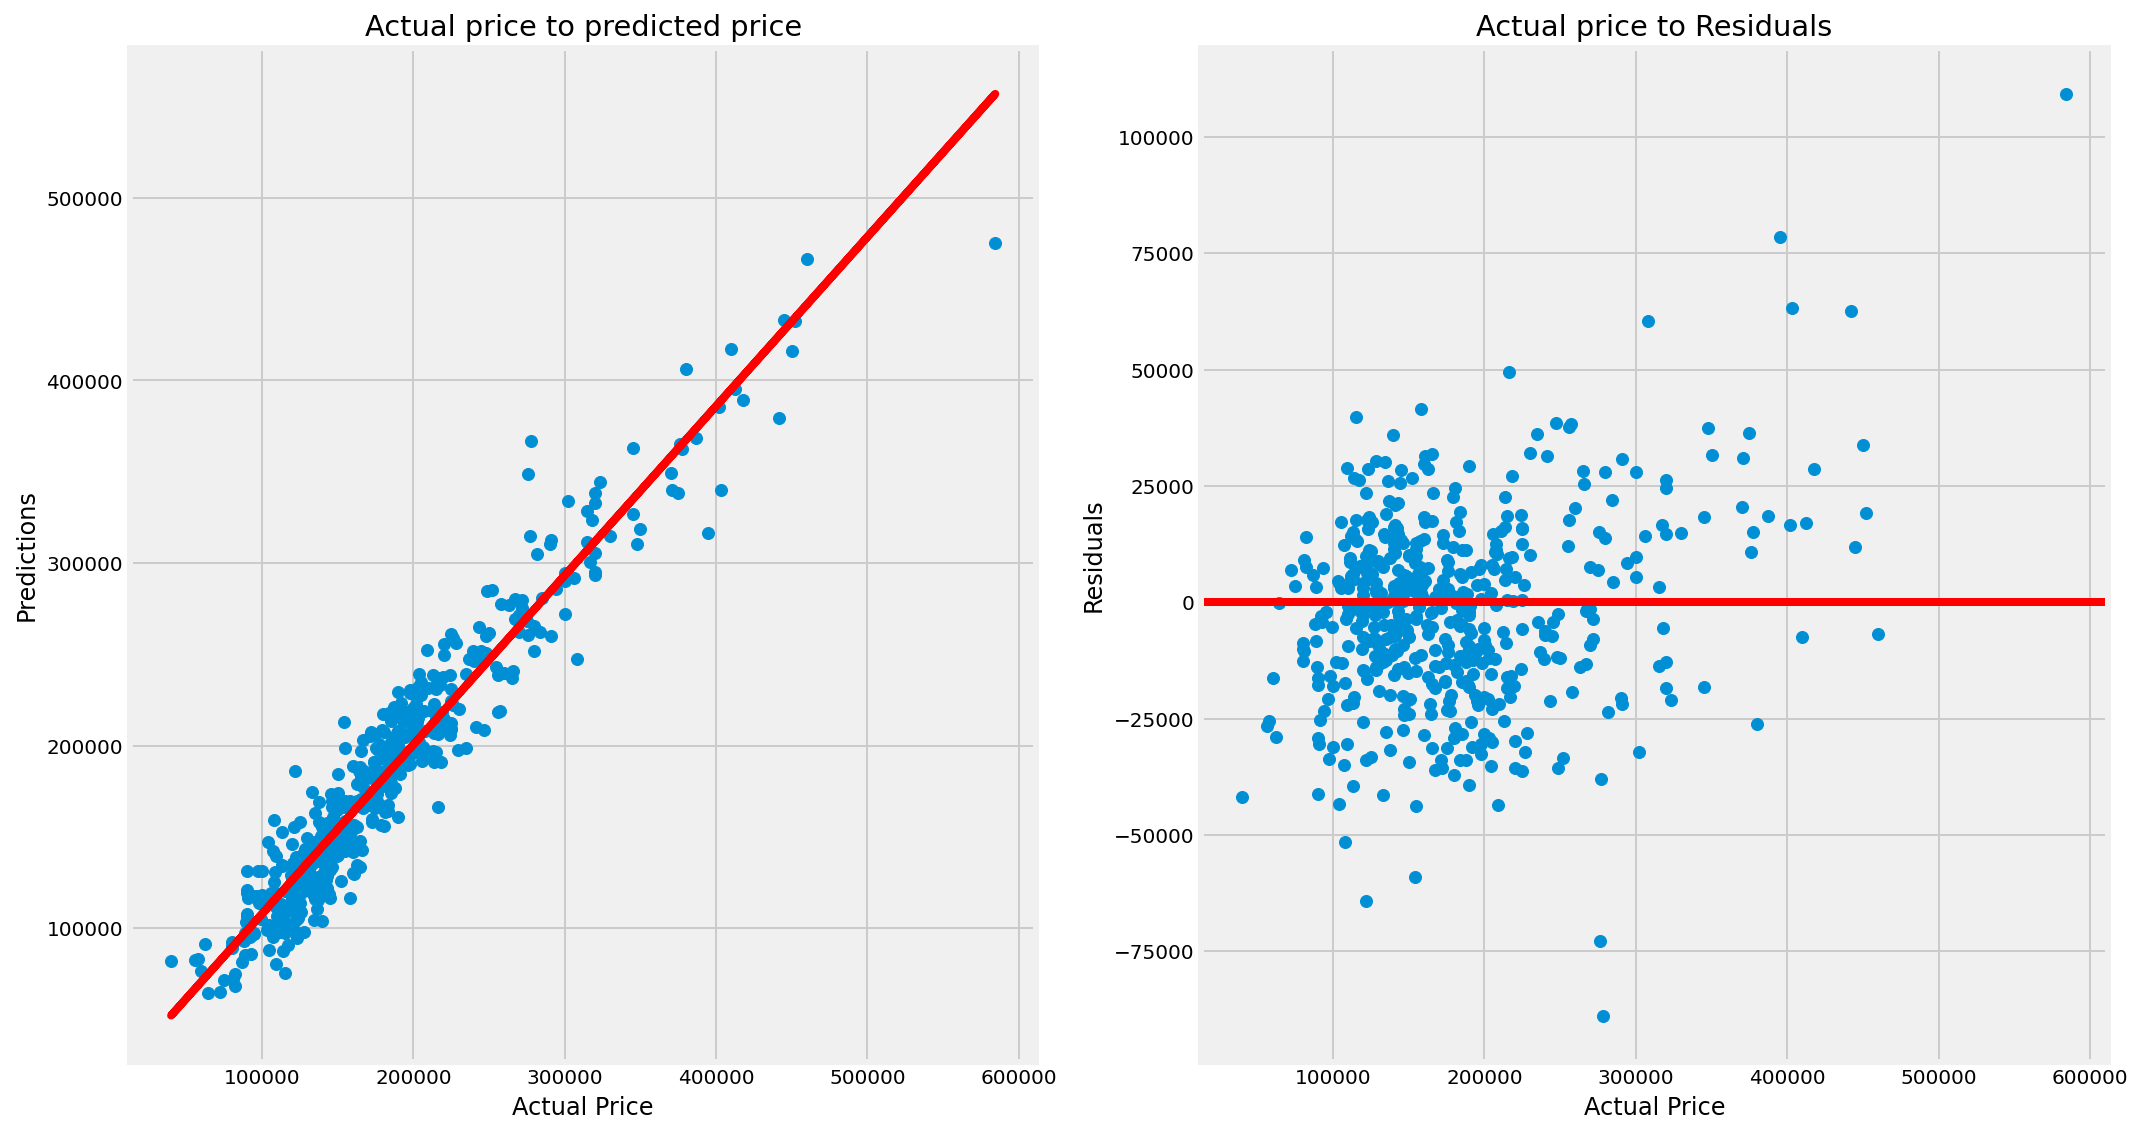

In [20]:
fig, ax = plt.subplots(1,2, figsize = [15,8]);
m, c = np.polyfit(y_test,ridge_pred,deg=1)
ax[0].scatter(y_test,ridge_pred);
ax[0].plot(y_test,(m*y_test)+c,c='r')
ax[0].set_title('Actual price to predicted price')
ax[0].set_ylabel('Predictions')
ax[0].set_xlabel('Actual Price')
ax[1].scatter(y_test,y_test - ridge_pred);
ax[1].axhline(y=0,c='r');
ax[1].set_title('Actual price to Residuals')
ax[1].set_xlabel('Actual Price')
ax[1].set_ylabel('Residuals')
fig.tight_layout()
print('Ridge Regression')
print('Mean Absolute error\t:{:.5f}'.format(mean_absolute_error(y_test,ridge_pred)))
print('Mean Squared error\t:{:.5f}'.format(mean_squared_error(y_test,ridge_pred)))
print('Root Mean Squared error\t:{:.5f}'.format(np.sqrt(mean_squared_error(y_test,ridge_pred))))
print('R^2 score is\t\t:{:.5f}'.format(np.mean(cross_val_score(ridge_model,X_test_ss,y_test,cv=10))))
print('Optimal Alpha is \t:{}'.format(ridge_model.alpha_))

**Lasso Model with default parameters**

In [21]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(n_alphas = 500)
# instantiate lasso regression

In [22]:
lasso_model.fit(X_train_ss,y_train)
lasso_pred = lasso_model.predict(X_test_ss)
# fitting and predicting

Lasso Regression
Mean Absolute error	:15334.28934
Mean Squared error	:416014580.72128
Root Mean Squared error	:20396.43549
R^2 score is		:0.91101
Optimal Alpha is 	:148.04523379772692


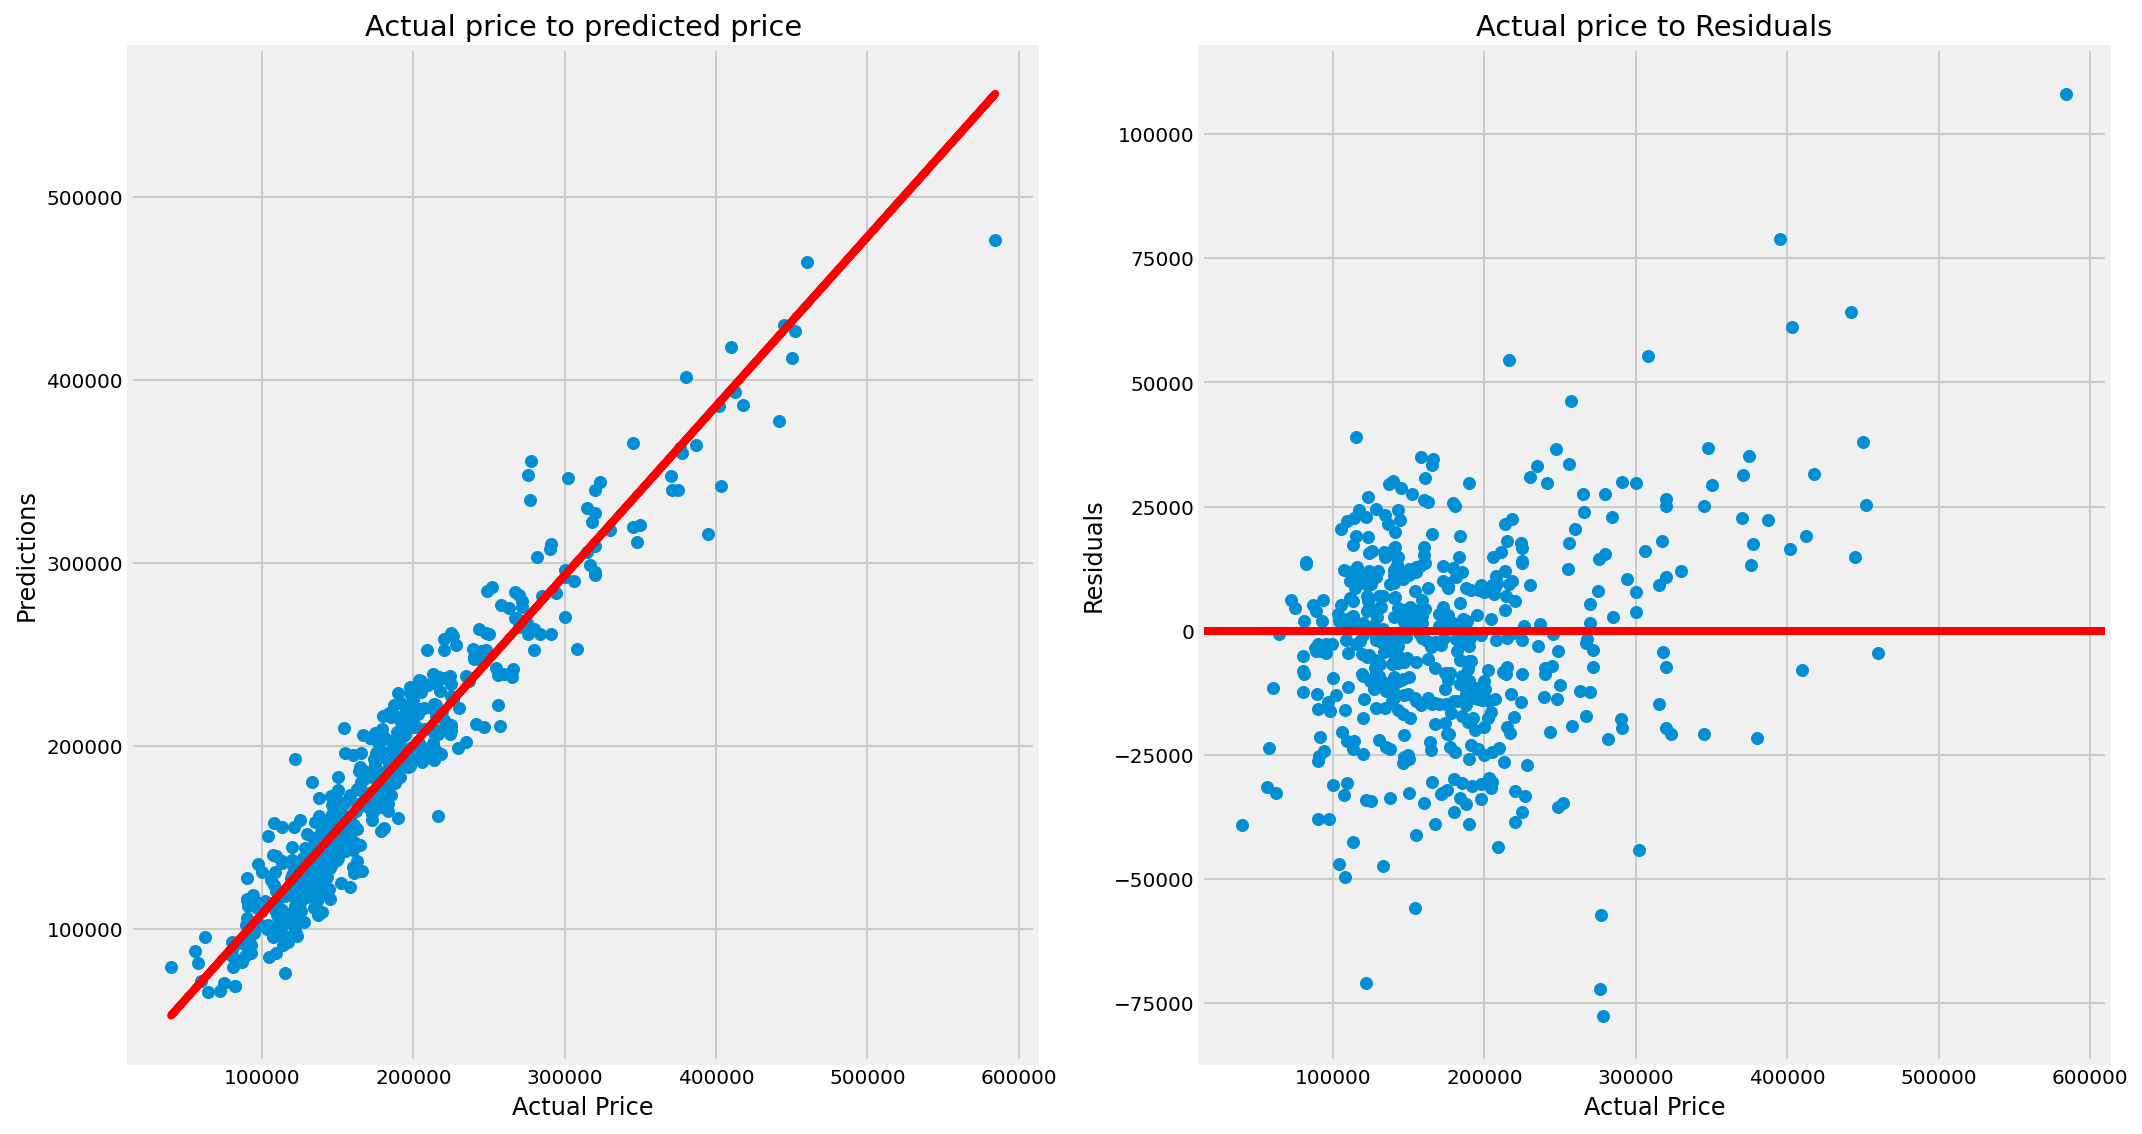

In [23]:
fig, ax = plt.subplots(1,2, figsize = [15,8]);
m, c = np.polyfit(y_test,lasso_pred,deg=1)
ax[0].scatter(y_test,lasso_pred);
ax[0].plot(y_test,(m*y_test)+c,c='r')
ax[0].set_title('Actual price to predicted price')
ax[0].set_ylabel('Predictions')
ax[0].set_xlabel('Actual Price')
ax[1].scatter(y_test,y_test - lasso_pred);
ax[1].axhline(y=0,c='r');
ax[1].set_title('Actual price to Residuals')
ax[1].set_xlabel('Actual Price')
ax[1].set_ylabel('Residuals')
fig.tight_layout()
print('Lasso Regression')
print('Mean Absolute error\t:{:.5f}'.format(mean_absolute_error(y_test,lasso_pred)))
print('Mean Squared error\t:{:.5f}'.format(mean_squared_error(y_test,lasso_pred)))
print('Root Mean Squared error\t:{:.5f}'.format(np.sqrt(mean_squared_error(y_test,lasso_pred))))
print('R^2 score is\t\t:{:.5f}'.format(np.mean(cross_val_score(lasso_model,X_test_ss,y_test,cv=10))))
print('Optimal Alpha is \t:{}'.format(lasso_model.alpha_))

In [24]:
lasso_coef = pd.DataFrame(lasso_model.coef_,index = X.columns).rename(columns={0:'coefficient'})
abs(lasso_coef).sort_values(by = 'coefficient',ascending = False).head(10)
# Top parameters determined by Lasso model

,coefficient
Liv Area_qual,29401.263908
bsmt sf_qual,25118.731646
Total Bsmt SF,10253.749856
Bsmt Unf SF,8447.308767
Liv Area_bsmt sf,8064.638648
Lot Area,6715.880971
sale_type_New,6482.973798
bsmt sf_neighbor,6379.480146
Liv Area_neighbor,6110.122278
Overall Qual,5987.905217


In [25]:
lasso_coef[lasso_coef['coefficient']==0].count()
# 29 parameters are dropped off by lasso model

coefficient    29
dtype: int64

In [26]:
lasso_coef[lasso_coef['coefficient']==0].index
# These are the 29 parameters are dropped off by lasso model

Index(['House Style', 'Overall Cond', 'Year Built', 'Exter Cond',
       'BsmtFin Type 1', 'BsmtFin SF 1', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Garage Cond', 'Enclosed Porch', 'Pool Area', 'Yr Sold',
       'mszoning_RM', 'Neighborhood_rank', 'bldgtype_Duplex',
       'roof_matl_other', 'exterior1_CemntBd', 'exterior1_MetalSd',
       'exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood',
       'vnr_other', 'foundation_CBlock', 'elect_SBrkr', 'garage_type_no',
       'garrage_finish_NA', 'garrage_finish_Unf', 'qual_neighbor'],
      dtype='object')

**ElasticNet Model with default parameters**

In [27]:
from sklearn.linear_model import ElasticNetCV
enet_model = ElasticNetCV(l1_ratio = np.linspace(0.01, 1.0, 25), n_alphas=100, cv = 10)
# instantiate ElasticNet regression

In [28]:
enet_model.fit(X_train_ss,y_train)
enet_pred = enet_model.predict(X_test_ss)
# fitting and predicting

ElasticNet Regression
Mean Absolute error	:15330.05449
Mean Squared error	:415745879.06022
Root Mean Squared error	:20389.84745
R^2 score is		:0.91371
Optimal Alpha is 	:142.81948367080423


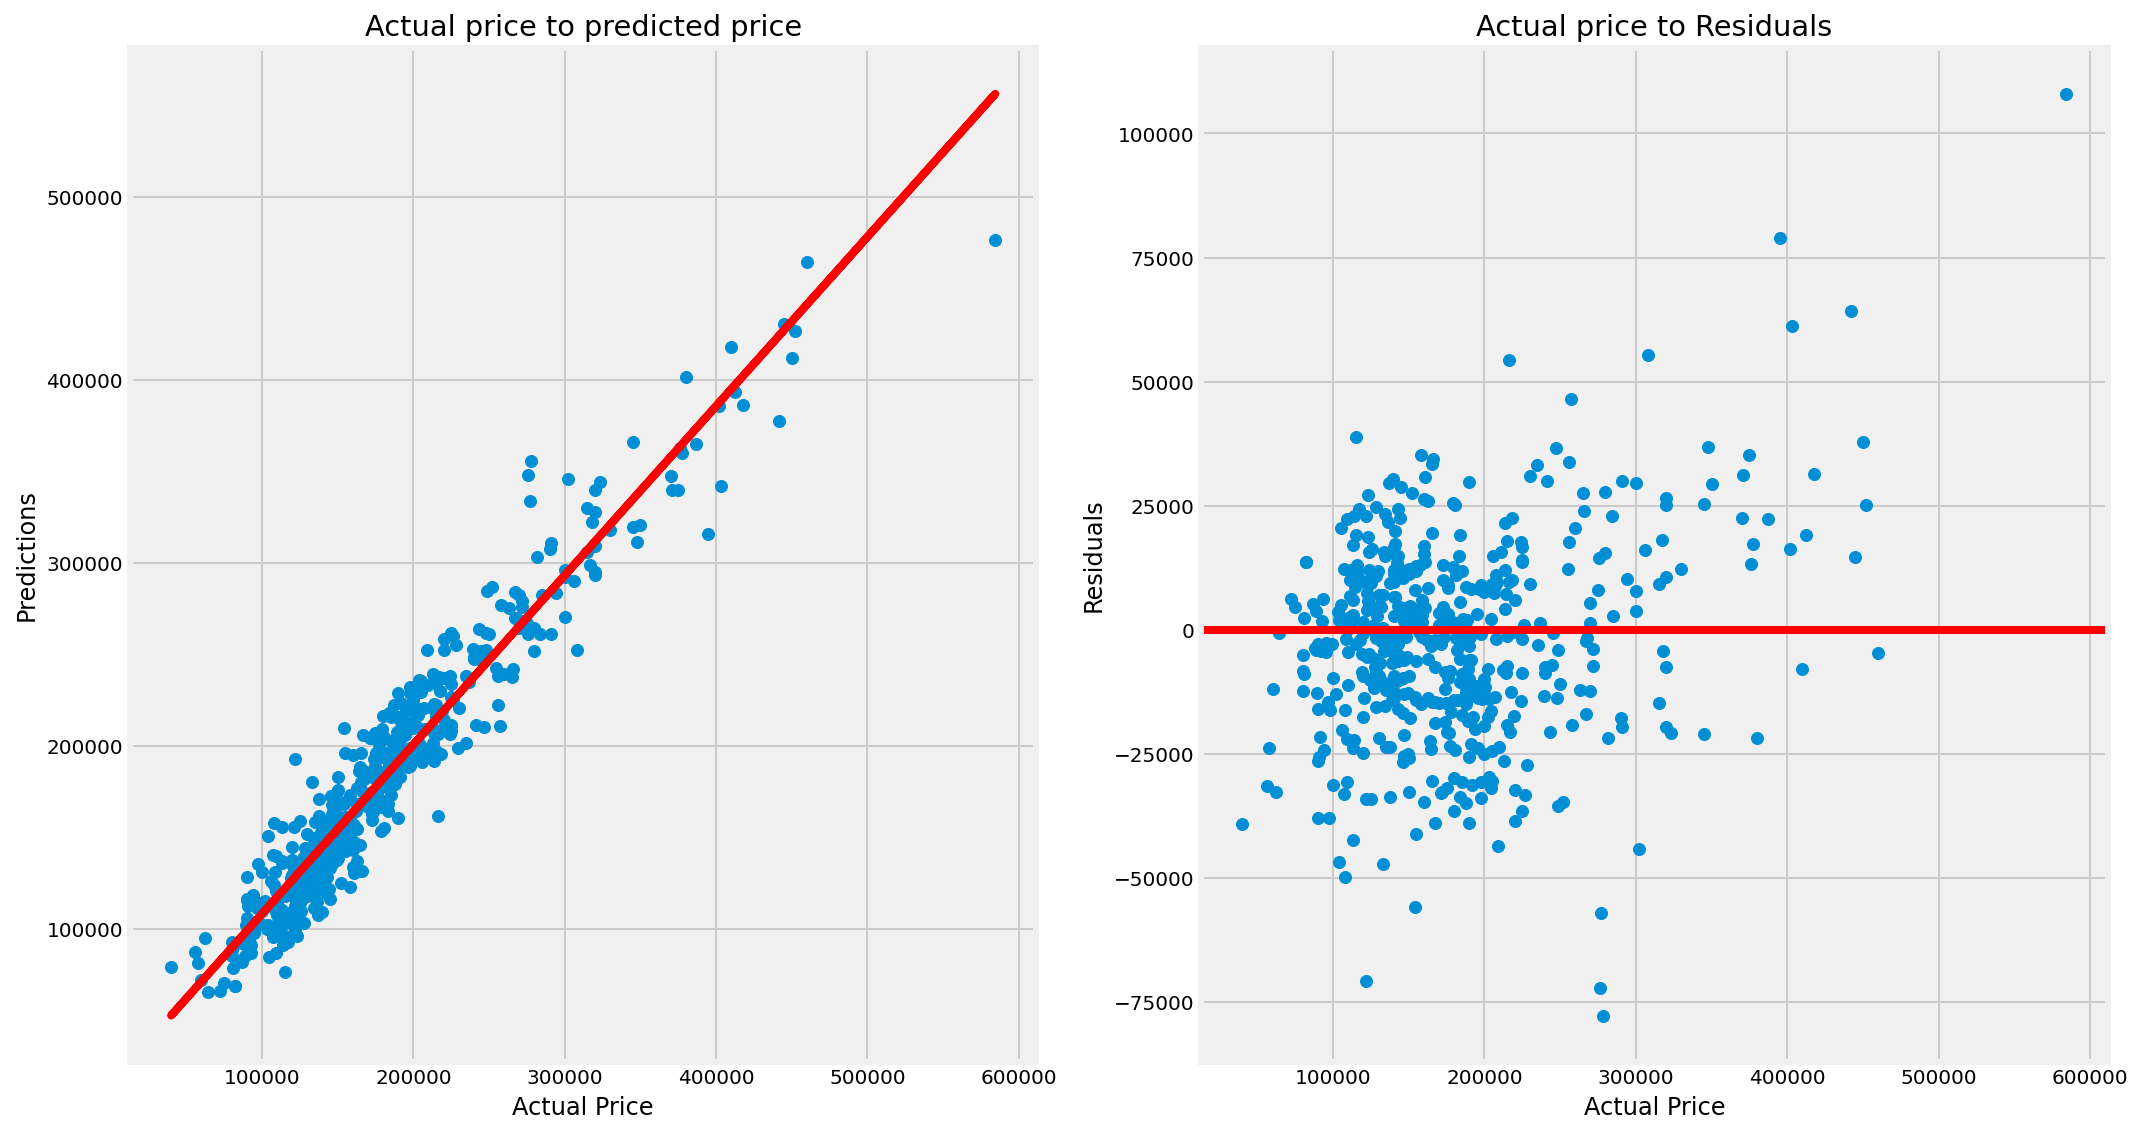

In [29]:
fig, ax = plt.subplots(1,2, figsize = [15,8]);
m, c = np.polyfit(y_test,enet_pred,deg=1)
ax[0].scatter(y_test,enet_pred);
ax[0].plot(y_test,(m*y_test)+c,c='r')
ax[0].set_title('Actual price to predicted price')
ax[0].set_ylabel('Predictions')
ax[0].set_xlabel('Actual Price')
ax[1].scatter(y_test,y_test - enet_pred);
ax[1].axhline(y=0,c='r');
ax[1].set_title('Actual price to Residuals')
ax[1].set_xlabel('Actual Price')
ax[1].set_ylabel('Residuals')
fig.tight_layout()
print('ElasticNet Regression')
print('Mean Absolute error\t:{:.5f}'.format(mean_absolute_error(y_test,enet_pred)))
print('Mean Squared error\t:{:.5f}'.format(mean_squared_error(y_test,enet_pred)))
print('Root Mean Squared error\t:{:.5f}'.format(np.sqrt(mean_squared_error(y_test,enet_pred))))
print('R^2 score is\t\t:{:.5f}'.format(np.mean(cross_val_score(enet_model,X_test_ss,y_test,cv=10))))
print('Optimal Alpha is \t:{}'.format(enet_model.alpha_))

## Select and scale features with effective features

In [30]:
X = train_set.drop(columns=['Unnamed: 0','Id','PID','House Style', 'Overall Cond', 'Year Built', 'Exter Cond',
       'BsmtFin Type 1', 'BsmtFin SF 1', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Garage Cond', 'Enclosed Porch', 'Pool Area', 'Yr Sold',
       'mszoning_RM', 'Neighborhood_rank', 'bldgtype_Duplex',
       'roof_matl_other', 'exterior1_CemntBd', 'exterior1_MetalSd',
       'exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood',
       'vnr_other', 'foundation_CBlock', 'elect_SBrkr', 'garage_type_no',
       'garrage_finish_NA', 'garrage_finish_Unf', 'qual_neighbor','SalePrice'])
# Remaining features at least effective features in predicting price

y = train_set['SalePrice']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Split the input data to train and test

In [32]:
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
# scaling the features

## Comparing and selecting model for implementation

In [33]:
def compare_models(models,diff_models): # Function to visualise model prediction and residuals
    
    fig, ax = plt.subplots(4,2, figsize = [12,15]);
    ax = ax.ravel()
    fig.suptitle('Different Models comparison',fontsize = 20, y=1.05)
    
    for i,j in enumerate(models):
        j.fit(X_train_ss, y_train)
        pred = j.predict(X_test_ss)
        m, c = np.polyfit(y_test,pred,deg=1)
        ax[i*2].scatter(y_test,pred);
        ax[i*2].plot(y_test,(m*y_test)+c,c='r')
        ax[i*2].set_title(diff_models[i]+'Actual price to predicted price')
        ax[i*2].set_ylabel('Predictions')
        ax[i*2].set_xlabel('Actual Price')
        ax[i*2+1].scatter(y_test,y_test - pred);
        ax[i*2+1].axhline(y=0,c='r');
        ax[i*2+1].set_title(diff_models[i]+'Actual price to Residuals')
        ax[i*2+1].set_xlabel('Actual Price')
        ax[i*2+1].set_ylabel('Residuals')
    
        print(diff_models[i])
        print('Mean Absolute error\t:{:.5f}'.format(mean_absolute_error(y_test,pred)))
        print('Mean Squared error\t:{:.5f}'.format(mean_squared_error(y_test,pred)))
        print('Root Mean Squared error\t:{:.5f}'.format(np.sqrt(mean_squared_error(y_test,pred))))
       
        if i != 0:
            print('Optimal Alpha is \t:{}'.format(j.alpha_))
        
        print('R^2 score\t\t:{:.5f}\n\n'.format(np.mean(cross_val_score(j,X_test_ss,y_test,cv=10))))
    
    fig.tight_layout()

Linear Regression Model
Mean Absolute error	:15398.44837
Mean Squared error	:416077515.70726
Root Mean Squared error	:20397.97823
R^2 score		:0.91389


Ridge Model
Mean Absolute error	:15447.58805
Mean Squared error	:416968178.03186
Root Mean Squared error	:20419.79868
Optimal Alpha is 	:4.2475715525368996
R^2 score		:0.91023


Lasso Model
Mean Absolute error	:15346.96879
Mean Squared error	:414513931.46842
Root Mean Squared error	:20359.61521
Optimal Alpha is 	:71.08159356753374
R^2 score		:0.91342


ElasticNet Model
Mean Absolute error	:15346.96879
Mean Squared error	:414513931.46842
Root Mean Squared error	:20359.61521
Optimal Alpha is 	:71.08159356753374
R^2 score		:0.91340




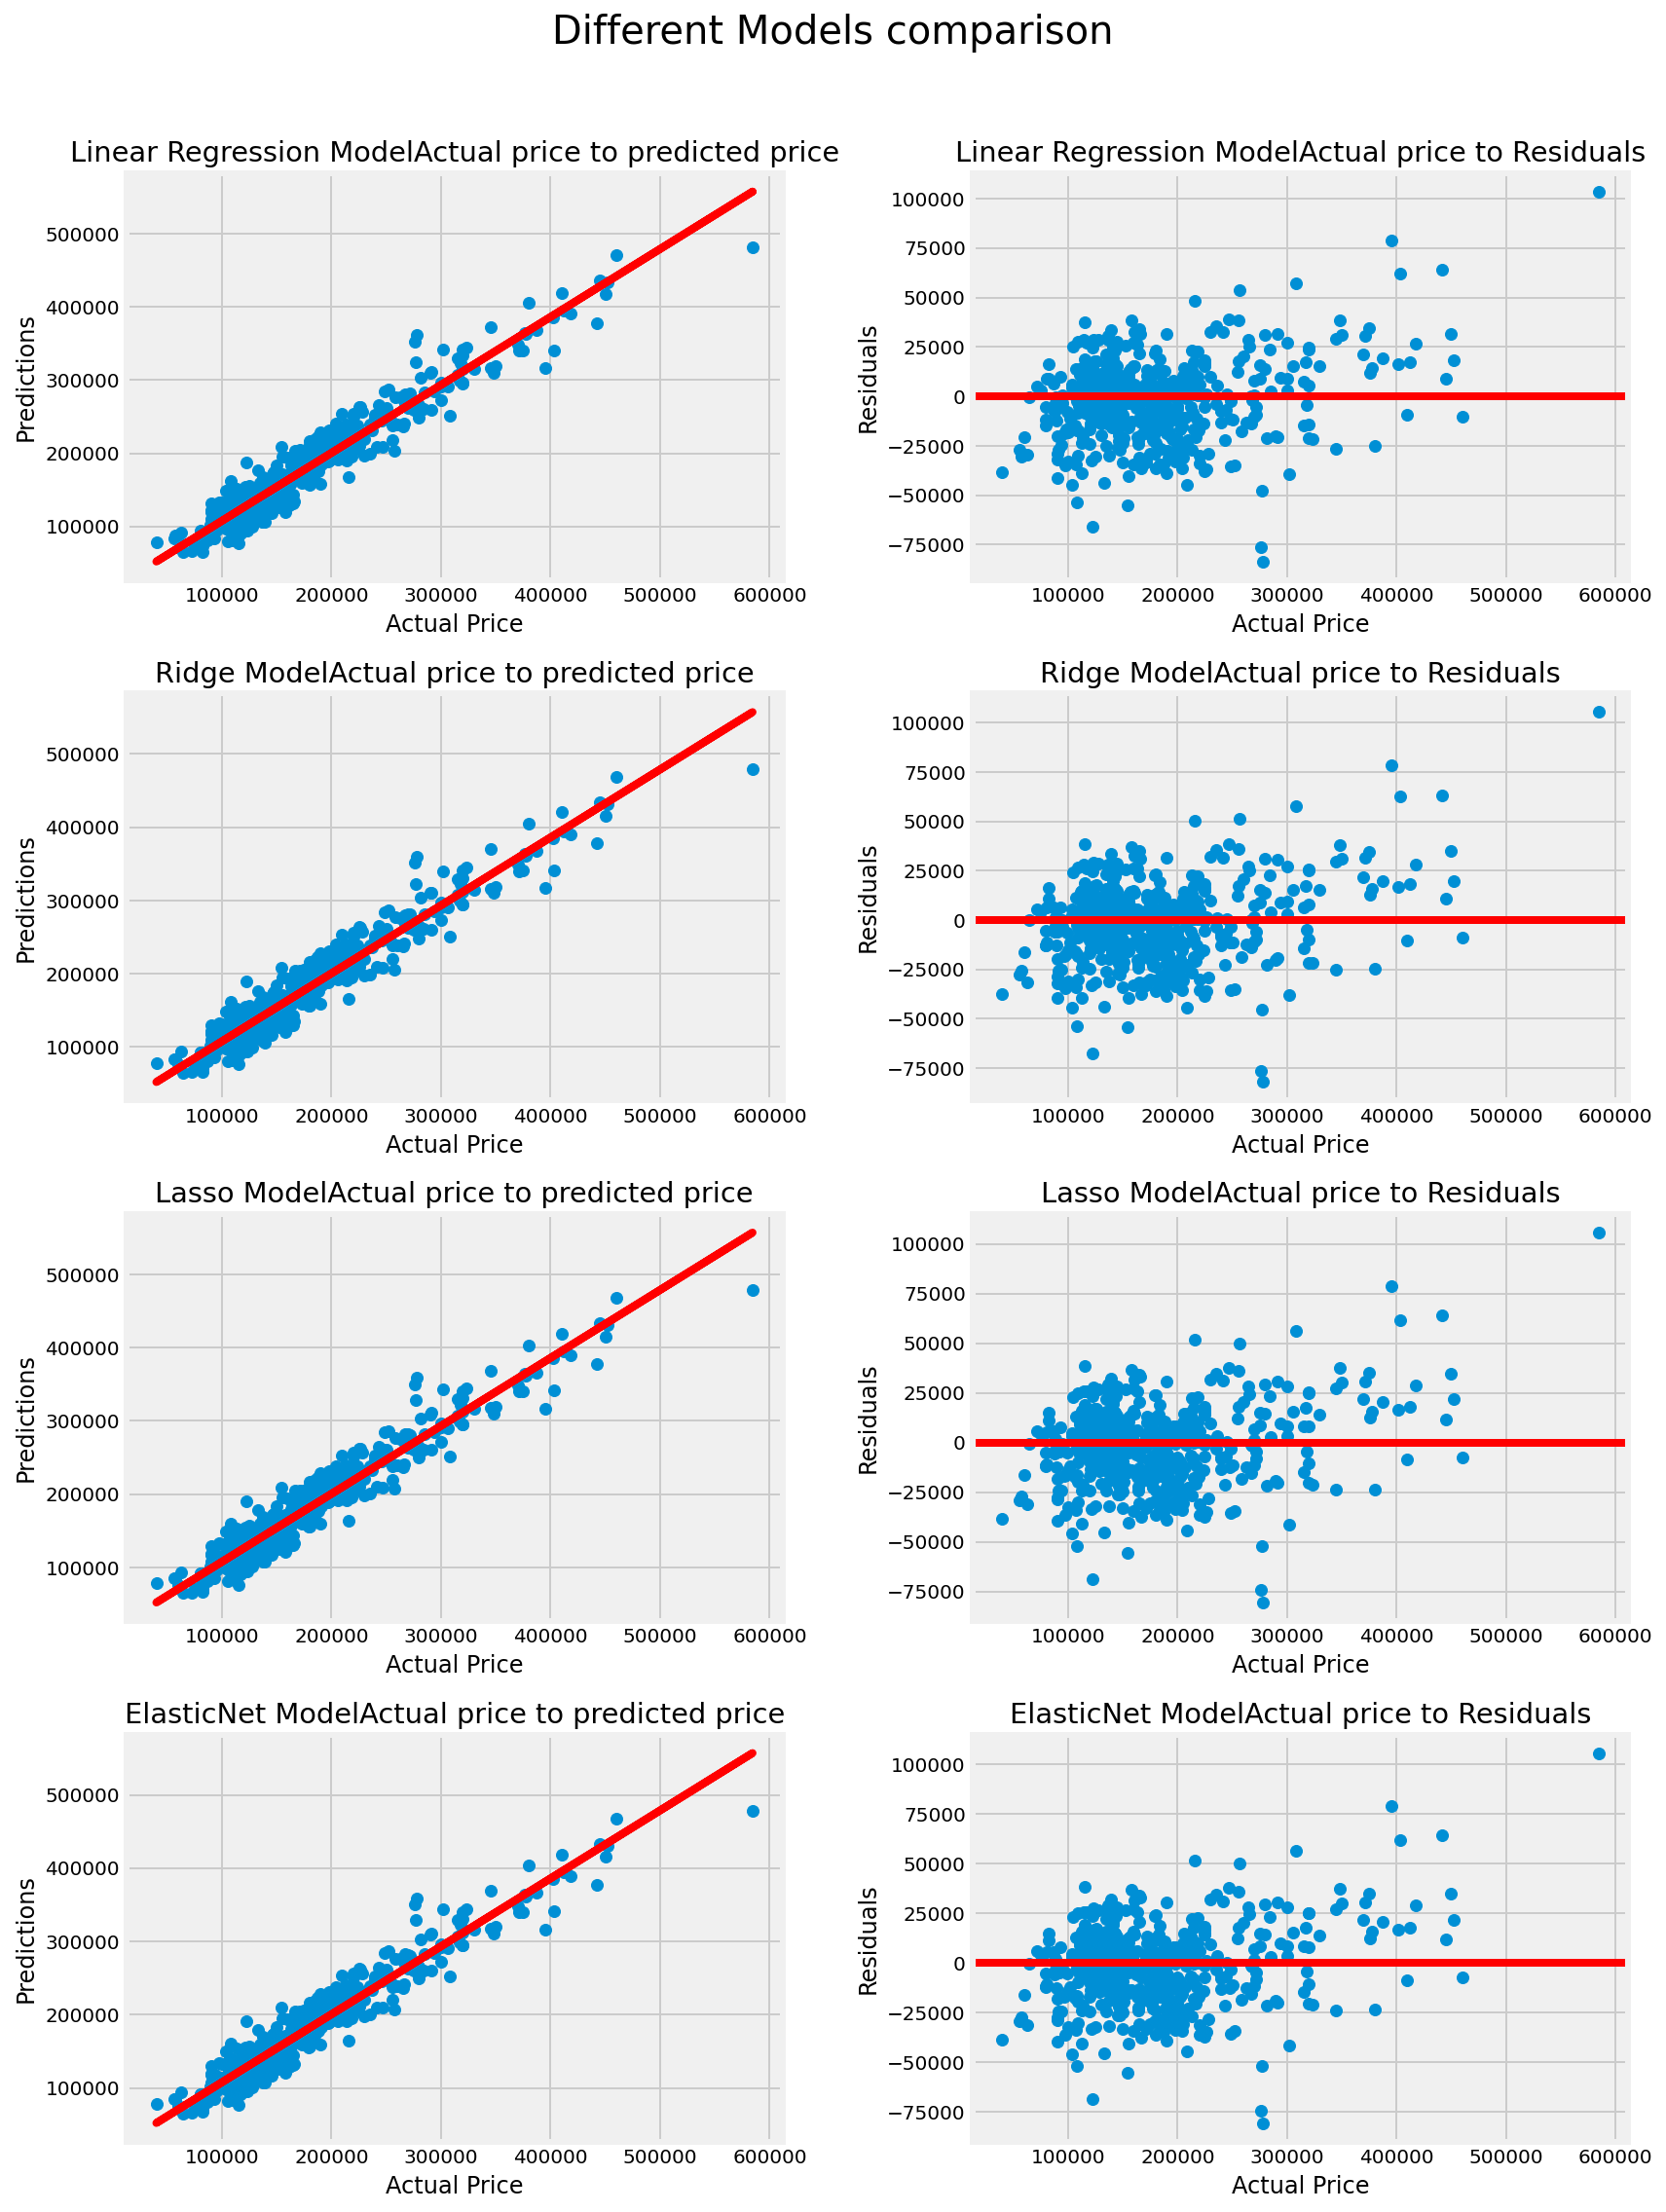

In [34]:
models = [lr,ridge_model,lasso_model,enet_model]
diff_models = ['Linear Regression Model','Ridge Model','Lasso Model','ElasticNet Model']
compare_models(models, diff_models)

Selected Lasso model for production and implementation as it gives the best results base on MAE, MSE, RMSE and R2 score.

**Linear Regression Model**
- Mean Absolute error	    :15398.44837
- Mean Squared error	    :416077515.70726
- Root Mean Squared error	:20397.97823
- R^2 score  		        :0.91389


**Ridge Model**
- Mean Absolute error	    :15447.58805
- Mean Squared error	    :416968178.03186
- Root Mean Squared error	:20419.79868
- Optimal Alpha is 	        :4.2475715525368996
- R^2 score		            :0.91023


**Lasso Model**
- Mean Absolute error  	    :15346.96879
- Mean Squared error	    :414513931.46842
- Root Mean Squared error	:20359.61521
- Optimal Alpha is 	        :71.08159356753374
- R^2 score		            :0.91342


**ElasticNet Model**
- Mean Absolute error	    :15346.96879
- Mean Squared error	    :414513931.46842
- Root Mean Squared error	:20359.61521
- Optimal Alpha is   	    :71.08159356753374
- R^2 score	             	:0.91340


**Selected Lasso model for production and implementation**